In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(7000, 18) (3000, 17) (3000, 2)


In [3]:
print(display(train.head(3)))
print(display(test.head(3)))
print(display(submission.head(3)))


,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0


None


,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
0,TEST_0000,40,165,55,20.20,0.9,1,98,47,75,0.5,229,59,155,13.7,1,1.73
1,TEST_0001,65,145,50,23.78,0.5,0,99,59,98,0.6,200,65,115,12.2,1,1.00
2,TEST_0002,40,160,75,29.30,1.0,0,105,34,232,0.6,170,50,73,15.1,1,1.33


None


,ID,label
0,TEST_0000,-1
1,TEST_0001,-1
2,TEST_0002,-1


None


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        7000 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     7000 non-null   int64  
 8   혈압        7000 non-null   int64  
 9   중성 지방     7000 non-null   int64  
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(5), int64(12), object(1)
memory usage: 984.5+ KB


In [5]:
train.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011650,0.227429,99.331857,45.532857,127.144714,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.427828,0.419202,21.129670,8.820611,73.918492,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,999.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


In [6]:
train.columns

Index(['ID', '나이', '키(cm)', '몸무게(kg)', 'BMI', '시력', '충치', '공복 혈당', '혈압',
       '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈', '요 단백',
       '간 효소율', 'label'],
      dtype='object')

In [7]:
train.columns = ['ID', 'age', 'cm', 'kg', 'BMI', 'eye', 'tooth', 'hungry_blood', 'press_blood', 'trans', 'blood_worm', 'col', 'high', 'low', 'blood_c', 'yo', 'gan', 'y_train']
test.columns = ['ID','age', 'cm', 'kg', 'BMI', 'eye', 'tooth', 'hungry_blood', 'press_blood', 'trans', 'blood_worm', 'col', 'high', 'low', 'blood_c', 'yo', 'gan']
train.head()

,ID,age,cm,kg,BMI,eye,tooth,hungry_blood,press_blood,trans,blood_worm,col,high,low,blood_c,yo,gan,y_train
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0


In [8]:
train.isnull().sum()

ID              0
age             0
cm              0
kg              0
BMI             0
eye             0
tooth           0
hungry_blood    0
press_blood     0
trans           0
blood_worm      0
col             0
high            0
low             0
blood_c         0
yo              0
gan             0
y_train         0
dtype: int64

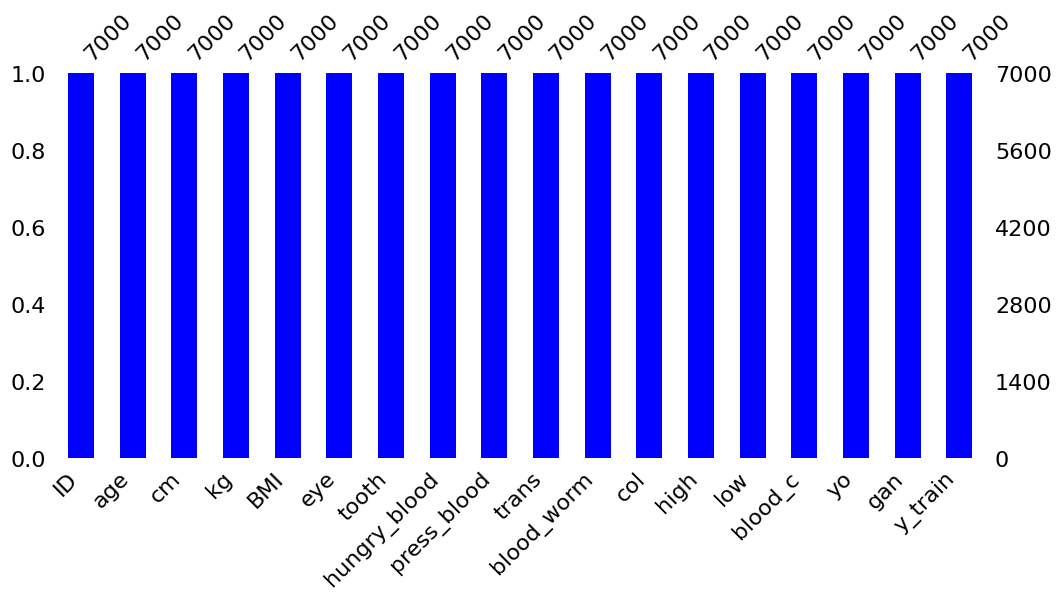

In [9]:
import missingno as msno
msno.bar(train, figsize=(12, 5), color='blue')
plt.show()

In [10]:
train1 = train.drop(['ID'], axis=1)
print(train1)

      age   cm   kg    BMI   eye  tooth  hungry_blood  press_blood  trans  \
0      35  170   70  24.22  1.10      1            98           40     80   
1      40  150   55  24.44  1.00      0           173           39    104   
2      60  170   50  17.30  0.75      0            96           40     61   
3      40  150   45  20.00  0.50      0            92           40     46   
4      55  155   65  27.06  1.00      0            87           42     95   
...   ...  ...  ...    ...   ...    ...           ...          ...    ...   
6995   25  170   65  22.49  1.50      0            87           45    141   
6996   60  165   65  23.88  0.90      0            87           45     82   
6997   40  180  100  30.86  1.20      0            97           44     87   
6998   60  150   55  24.44  0.60      0            89           57    161   
6999   50  165   65  23.88  0.65      0           104           47    124   

      blood_worm  col  high  low  blood_c  yo   gan  y_train  
0           

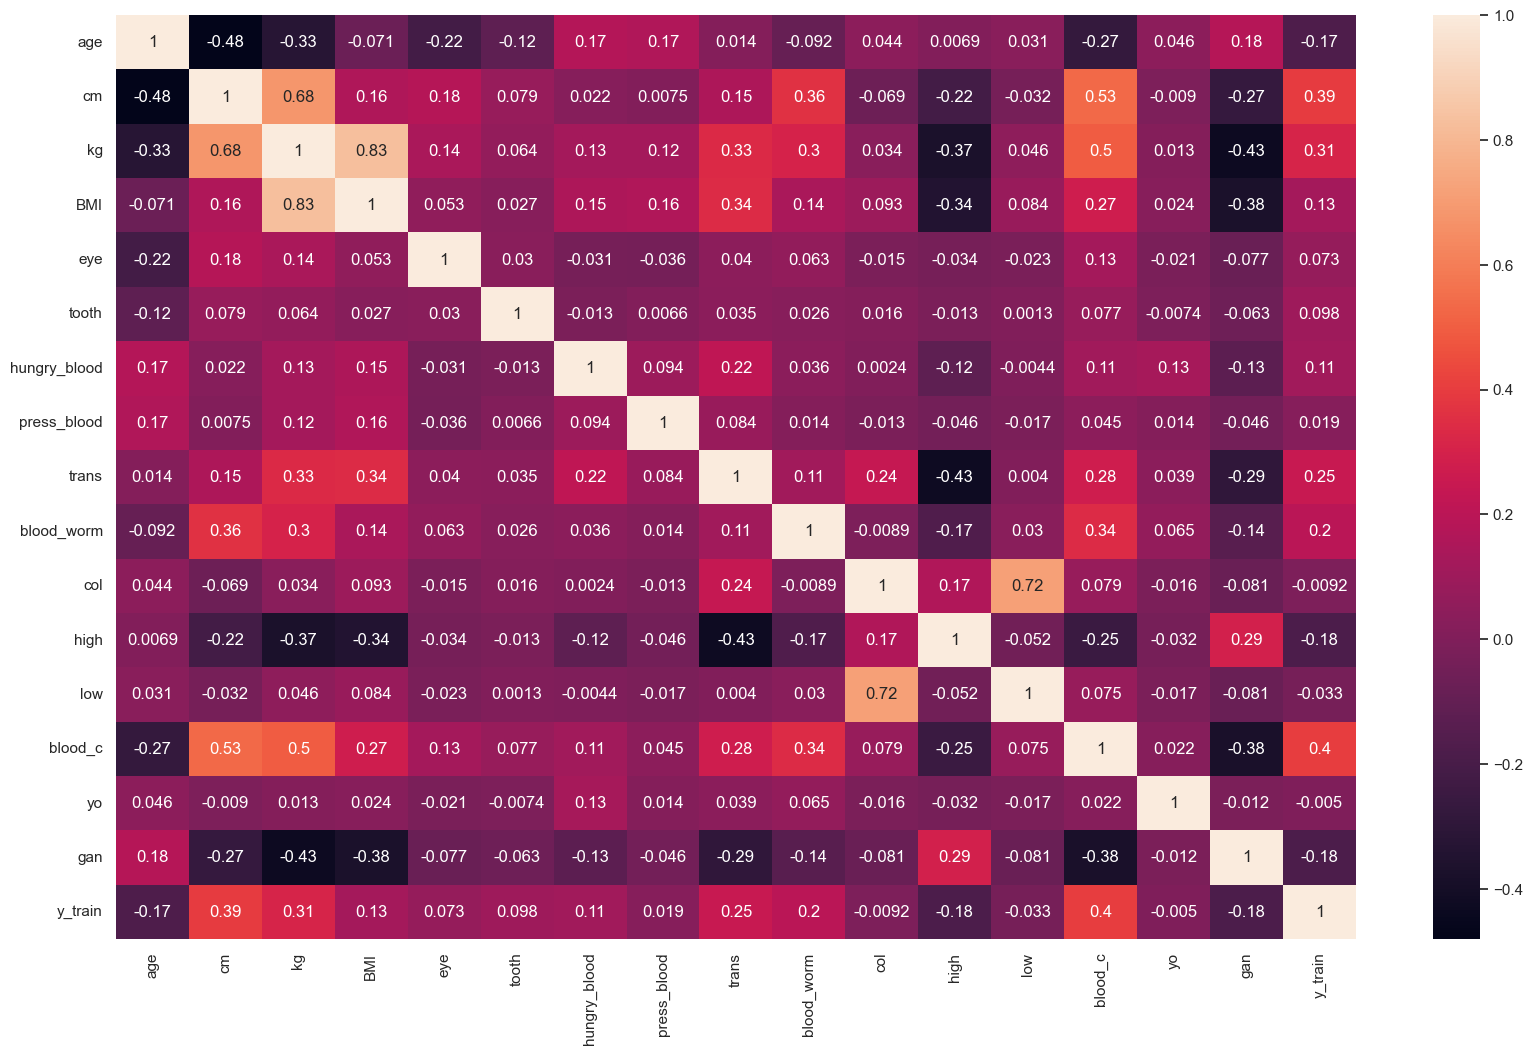

In [11]:
plt.figure(figsize=(20,12))
sns.set(font_scale=1.0)
sns.heatmap(train1.corr(), annot=True, cbar=True)
plt.show()

In [12]:
b = ['cm', 'kg', 'trans', 'blood_c', 'y_train']
df = train[b]
df

,cm,kg,trans,blood_c,y_train
0,170,70,80,15.9,1
1,150,55,104,11.8,0
2,170,50,61,15.3,0
3,150,45,46,13.4,0
4,155,65,95,13.8,0
...,...,...,...,...,...
6995,170,65,141,14.9,0
6996,165,65,82,14.3,1
6997,180,100,87,15.6,0
6998,150,55,161,14.4,0


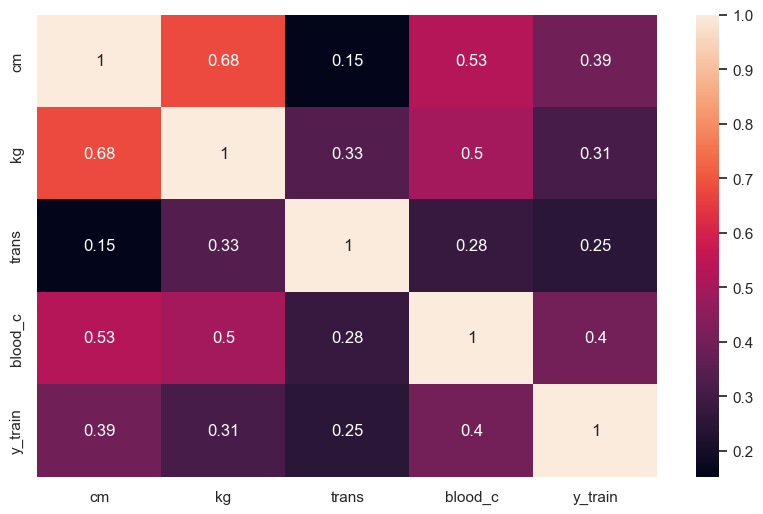

In [13]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

In [14]:
x_train = df.drop(['y_train'], axis=1)
y_train = df[['y_train']]
print(x_train.shape, y_train.shape)
print(x_train)

(7000, 4) (7000, 1)
       cm   kg  trans  blood_c
0     170   70     80     15.9
1     150   55    104     11.8
2     170   50     61     15.3
3     150   45     46     13.4
4     155   65     95     13.8
...   ...  ...    ...      ...
6995  170   65    141     14.9
6996  165   65     82     14.3
6997  180  100     87     15.6
6998  150   55    161     14.4
6999  165   65    124     13.6

[7000 rows x 4 columns]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


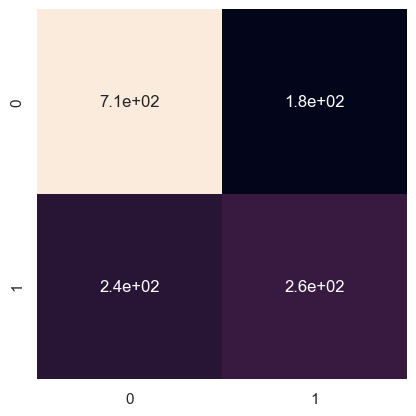

In [15]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()

In [16]:
print(y_val)

      y_train
6401        1
2488        1
6078        0
3007        0
97          1
...       ...
6972        0
523         1
1063        1
5876        1
6486        0

[1400 rows x 1 columns]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.6971
Precision:0.5884
recall:0.5229
F1:0.5537
roc_auc:0.6589


In [18]:
train['y_train'].value_counts(dropna=False)

y_train
0    4429
1    2571
Name: count, dtype: int64

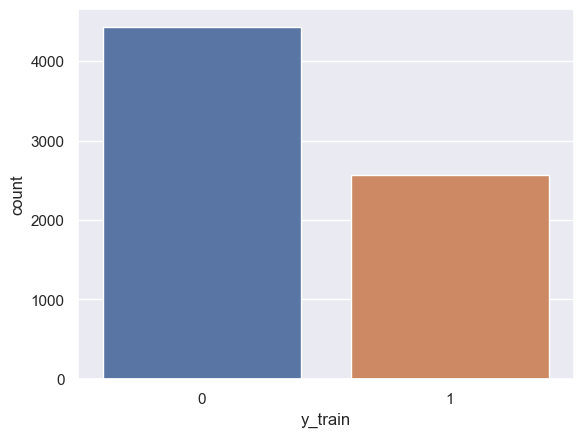

In [19]:
sns.countplot(x='y_train', data=train)
plt.show()

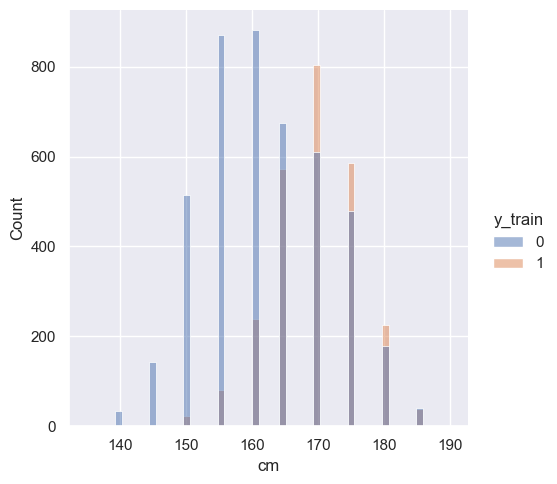

In [20]:
sns.displot(x='cm', kind='hist', hue='y_train', data=train)
plt.show()

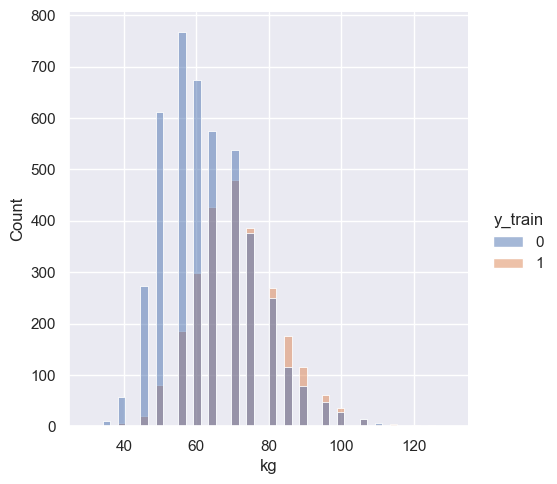

In [21]:
sns.displot(x='kg', kind='hist', hue='y_train', data=train)
plt.show()

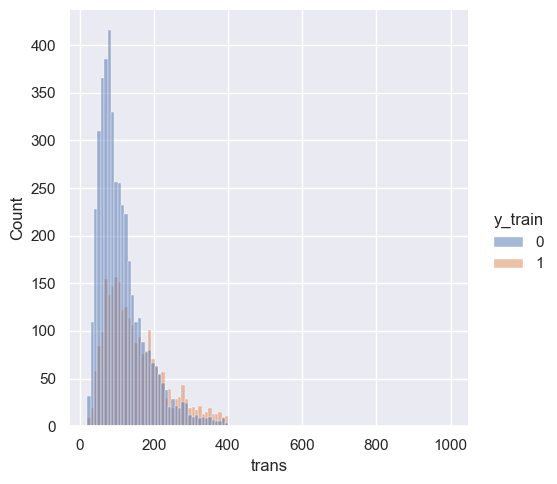

In [22]:
sns.displot(x='trans', kind='hist', hue='y_train', data=train)
plt.show()

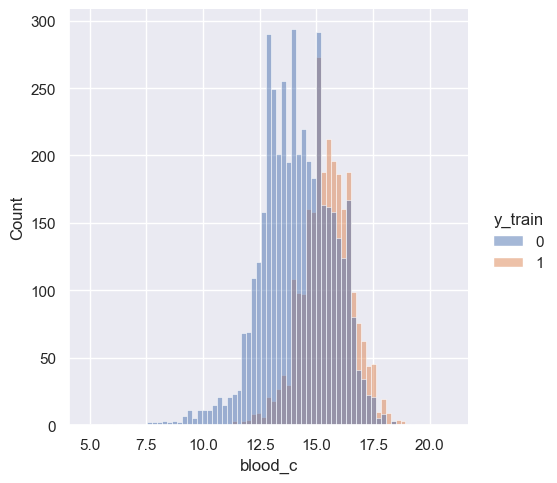

In [23]:
sns.displot(x='blood_c', kind='hist', hue='y_train', data=train)
plt.show()

In [24]:
x_train['y_train'] = y_train
x_train.head()

,cm,kg,trans,blood_c,y_train
0,170,70,80,15.9,1
1,150,55,104,11.8,0
2,170,50,61,15.3,0
3,150,45,46,13.4,0
4,155,65,95,13.8,0


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


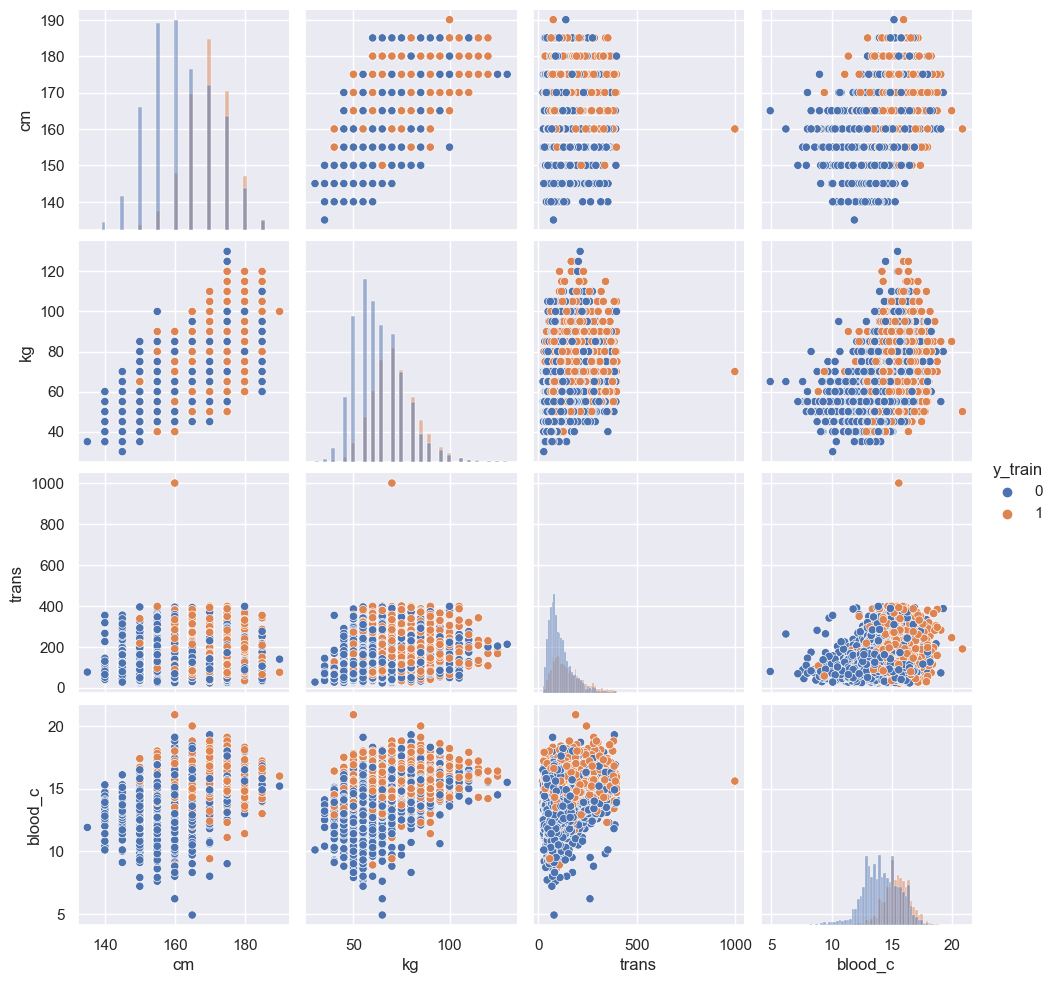

In [25]:
sns.pairplot(x_train, hue='y_train', size=2.5, diag_kind='hist')
plt.show()

0       4.394449
1       4.653960
2       4.127134
3       3.850148
4       4.564348
          ...   
6995    4.955827
6996    4.418841
6997    4.477337
6998    5.087596
6999    4.828314
Name: transLog, Length: 7000, dtype: float64


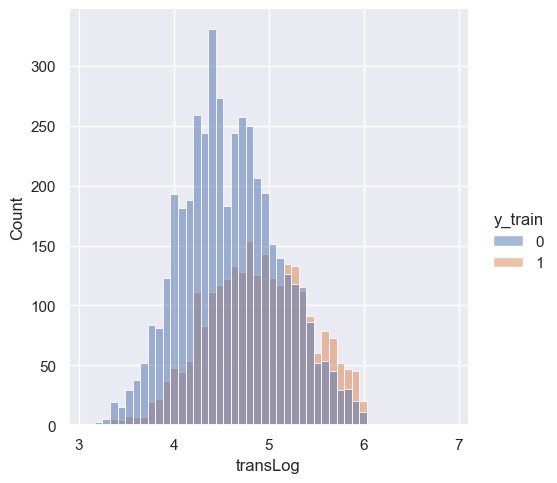

In [28]:
x_train['transLog'] = np.log1p(train['trans'])
# FareLog 분포
print(x_train['transLog'])
sns.displot(x='transLog', kind='hist', hue='y_train', data=x_train)
plt.show()

In [29]:
x_train = x_train.drop(['trans', 'y_train'], axis=1)

In [30]:
from sklearn.model_selection import train_test_split
x_data = x_train.loc[:,:]
y_data = train.loc[:,'y_train']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5600, 4) (5600,)
(1400, 4) (1400,)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
y_knn_pred = knn.predict(x_test)
print("예측값:", y_knn_pred[:5])

예측값: [0 1 0 0 0]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f"accuracy:{knn_acc}%")

accuracy:0.6807142857142857%


In [58]:
from sklearn import svm
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter = 100),
    KNeighborsClassifier(n_neighbors = 9, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 10),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
]

In [59]:
import time
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [61]:
score(x_train, y_train, X_test, y_test, names = names, models = models)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

,Classifier,Training accuracy,Validation accuracy
0,Logistic Regression,0.632679,0.632857
3,Linear SVM,0.632679,0.632857
5,SGD Classifier,0.632679,0.632857
6,Ridge Classifier,0.632679,0.632857
8,AdaBoost,0.635000,0.625714
7,XGBoost,0.784464,0.572857
1,KNN Classifier,0.675536,0.565714
4,Random Forest,0.958571,0.564286
2,Decision Tree,0.987143,0.540714


In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=20)

from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='roc_auc')
print("개별 Fold의 AUC 점수 :", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))

개별 Fold의 AUC 점수 : [0.5166 0.5147 0.4989 0.5521 0.5093]
평균 AUC 점수: 0.5183


In [49]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=20)

In [50]:
def plot_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = [features[i] for i in indices]
    feature_imp = importances[indices]

    plt.figure(figsize=(10,12))
    plt.title("Feature impotance")
    plt.barh(range(len(indices)), feature_imp, align='center')
    plt.yticks(range(len(indices)), feature_names)
    plt.xlabel("Relative Importance")
    print("피처:", list(reversed(feature_names)))
    print("중요도:", list(reversed(feature_imp)))

    return list(reversed(feature_names)), list(reversed(feature_imp))

In [51]:
selected_features = list(x_train.columns)
selected_features

['cm', 'kg', 'blood_c', 'transLog']

피처: ['transLog', 'blood_c', 'kg', 'cm']
중요도: [0.44520896300706864, 0.29425954982875985, 0.14841157312545947, 0.11211991403871212]


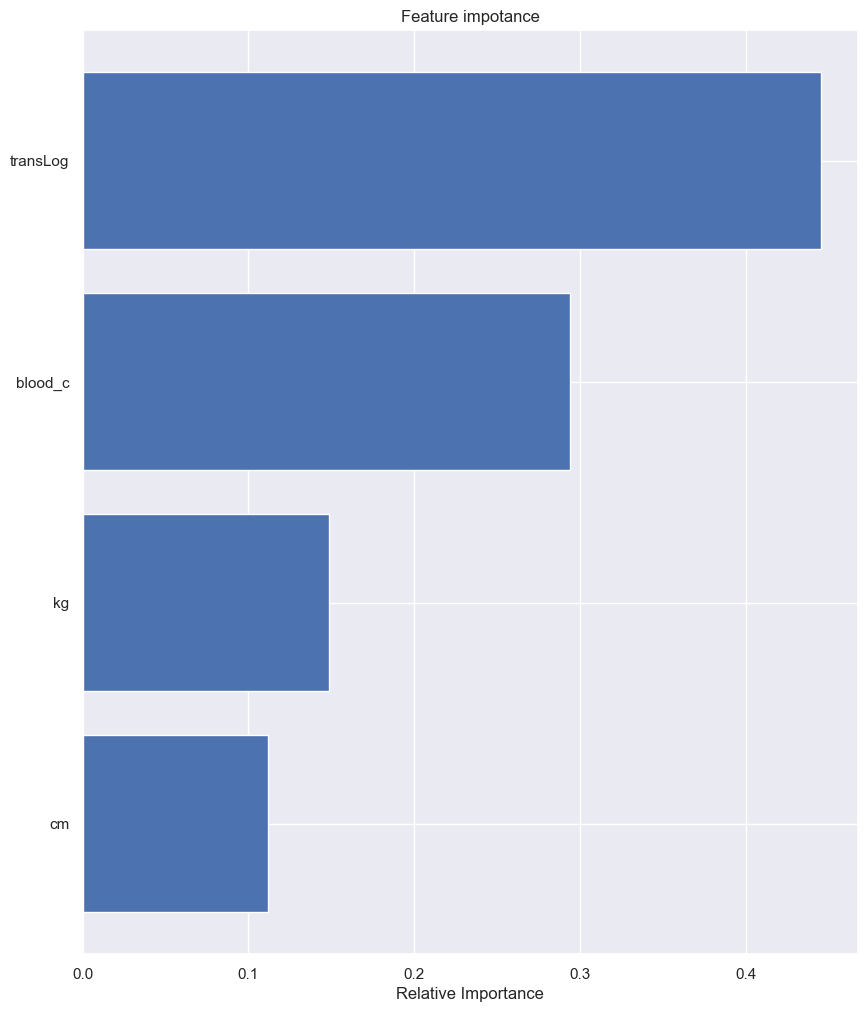

In [52]:
imp_features, imp_scores = plot_importance(rf_model, selected_features)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [54]:
y_knn_pred = knn.predict(x_test)
print("예측값:", y_knn_pred[:5])

예측값: [0 1 0 0 0]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f"accuracy:{knn_acc}%")

accuracy:0.55%


In [56]:
from catboost import CatBoostClassifier, Pool
from collections import defaultdict
model = CatBoostClassifier(random_seed=42, verbose=0)
model.fit(x_train, y_train)

In [57]:
y_pred = model.predict_proba(x_train)
print(y_pred)

[[0.66832889 0.33167111]
 [0.68918478 0.31081522]
 [0.68216859 0.31783141]
 ...
 [0.71420878 0.28579122]
 [0.51608872 0.48391128]
 [0.62883127 0.37116873]]
